Il arrive fréquemment qu'on cherche à obtenir le signal modulant à partir du signal modulé en amplitude (cas en radio AM par exemple). Nous allons voir dans ce TP deux méthodes permettant de le réaliser :
* la détection d'enveloppe
* la détection synchrone

# (Travail) Etude préliminaire

## Détection d'enveloppe
La détection d'enveloppe est basé sur l'utilisation d'un dipôle non linéaire : la diode. Le circuit détecteur d'enveloppe est le [suivant](detecteur).

```{figure} ./images/detecteur_crete.jpg
:name: detecteur
:align: center
Montage détecteur d'enveloppe.
```

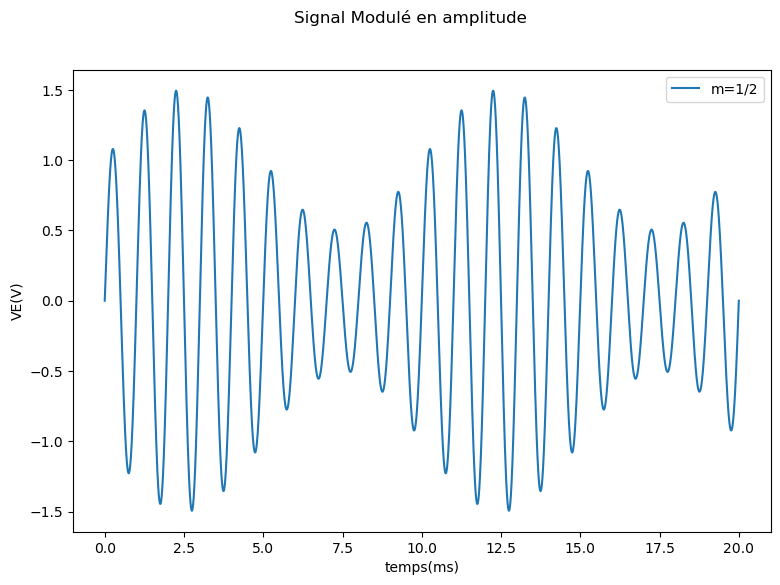

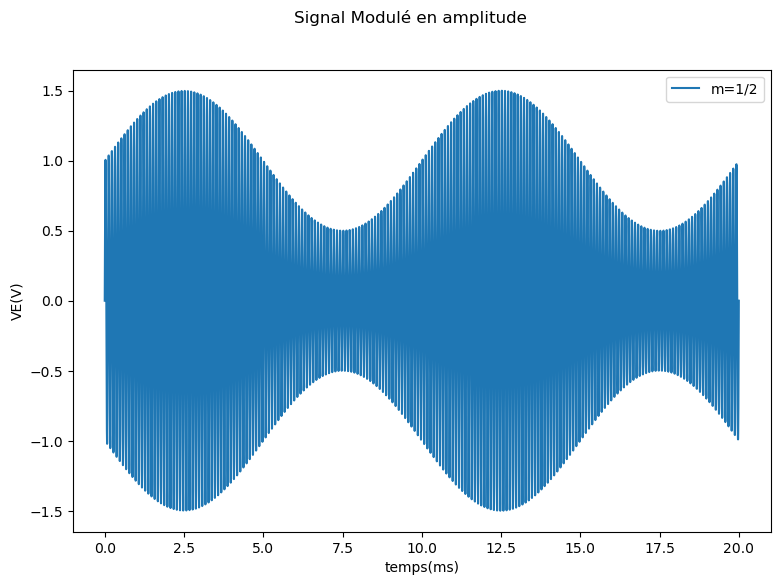

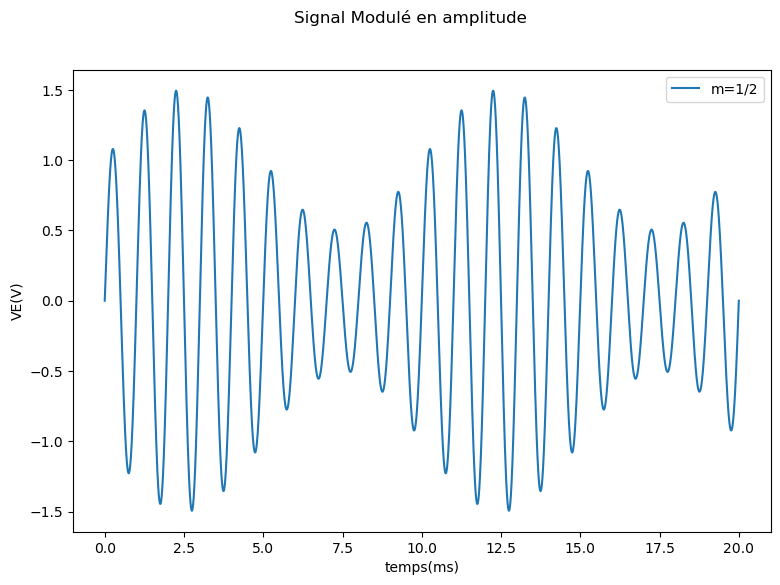

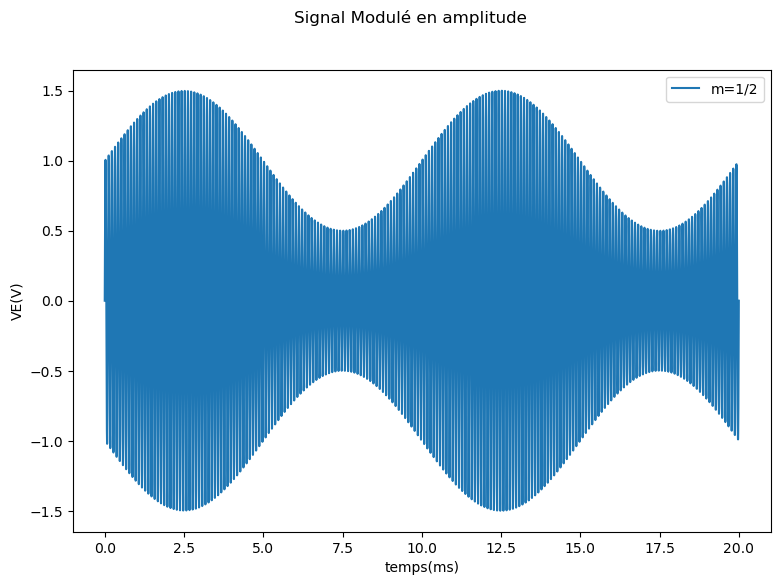

In [1]:
from matplotlib.pyplot import *
from numpy import *
from myst_nb import glue

T = 0.01
x = linspace(0, 2 * T, 10000)
y = sin(2 * pi * 1000  * x) + 1 / 2 * sin(2 * pi * 1000  * x) * sin(2 * pi * 100  * x)
y2 = sin(2 * pi * 10000  * x) + 1 / 2 * sin(2 * pi * 10000  * x) * sin(2 * pi * 100  * x)

f, ax = subplots(figsize=(9,6))
f.suptitle('Signal Modulé en amplitude')

ax.set_xlabel('temps(ms)')
ax.set_ylabel('VE(V)')

ax.plot(x * 1000, y, label="m=1/2")

ax.legend()

f2, ax2 = subplots(figsize=(9,6))
f2.suptitle('Signal Modulé en amplitude')

ax2.set_xlabel('temps(ms)')
ax2.set_ylabel('VE(V)')

ax2.plot(x * 1000, y2, label="m=1/2")

ax2.legend()

glue('sig_mod', f)
glue('sig_mod2', f2)

Le signal en entrée $V_E(t)$ est le signal modulé en amplitude. On donne son [allure](signal_module)

```{glue:figure} sig_mod
:name: signal_module
:align: center
Allure temporelle de $V_E(t)$ pour $f_p = 10 f_m$
```

````{admonition} Exercice : Etude du circuit
:class: tip
1. L'étude de la caractéristique dynamique de la diode aux différents signaux nous permet-elle d'utiliser la caractéristique statique de la diode pour analyser le circuit précédent ?
2. On prendra pour l'instant $U_D = 0$ sur la modélisation de la diode.
3. On suppose que à $t=0$ la diode est dans un état passant ($u_{diode} = U_D = 0$).
    1. A quoi est équivalente la diode dans ces conditions ?
    2. Comment va évoluer la tension $V_S(t)$ aux bornes du générateur en fonction de $V_E(t)$ ?
    3. A quelle moment $i_C$ s'annule ? _$i_R$ étant relativement faible, on pourra faire comme si c'est aussi le moment où la diode se bloque._
    4. Reproduire le signal $V_E(t)$ et représenter $V_S(t)$ jusqu'au moment où la diode se bloque.
4. La diode est maintenant bloquée ($i=0$). Elle le restera tant que $u_{diode} < U_D = 0$.
    1. Dans quel régime est alors le condensateur ? En déduire sans calcul l'allure temporelle de $V_S(t)$ et le temps caractéristique $\tau$ associé à sa variation.
    2. Donner une première condition sur $\tau$ pour que le détecteur d'enveloppe ne suive pas les variations rapides du signal.
    3. Quand la diode va-t-elle redevenir passante ?
5. Avec la condition suivante, poursuivre le tracé de $V_S(t)$ jusqu'à ce que le signal d'entrée soit au sommet de son enveloppe.
6. Justifier que pour que le signal de sortie suive l'enveloppe du signal à partir de ce point là, il faut imposer une deuxième condition sur $\tau$.
````

__Dans le cas précédente $f_p = 10 f_m$, il est difficile d'imposer les deux conditions de manière acceptable (c'est d'ailleurs difficile de dessiner un signal qui suit bien l'enveloppe). En TP, on aura un rapport 100 entre les fréquences ce qui permettra de réaliser les deux conditions.__

```{glue:figure} sig_mod2
:name: signal_module2
:align: center
Allure temporelle de $V_E(t)$ pour $f_p = 100 f_m$
```


````{admonition} Exercice : Surmodulation
:class: tip
1. Dessiner l'allure de $V_E(t)$ pour $m > 1$.
2. Quelle va être l'allure du signal à la sortie du détecteur d'enveloppe (les deux conditions précédentes ayant été réalisées). Quel problème observe-t-on ?
````

__C'est une des limites de la détection de crête. L'utilisation d'une détection synchrone permet de s'affranchir de cette limite.__


## Détection synchrone
La détection synchrone consiste à :
1. multiplier le signal modulé par un signal sinuoïdal de fréquence $f_p$ accordé avec la porteuse.
2. faire passer ce signal par un filtre passe-bas de fréquence de coupure judicieusement choisie.
3. Si nécessaire couper la composante continue restante avec un filtre passe-haut (pas réalisé en TP).

### Multiplication
On multiplie donc $V_E(t)$ par un signal de fréquence $f_p$. On note le signal obtenu $V_{s1}$

````{admonition} Exercice : Etude spectrale
:class: tip
1. Déterminer le spectre du signal $V_{s1}$.
2. Pourquoi un filtre passe-bas permet (à la composante continue près et à un facteur près) de retrouver le signal modulant ? Comment choisir (approximativement) la fréquence de coupure du filtre.
````

### Filtre passe-bas
Nous allons utiliser un [filtre passe-bas actif](pbas).

```{figure} ./images/pbas_actif.png
:name: pbas
:align: center
Filtre passe-bas actif du second ordre.
```

````{admonition} Exercice : Dimensionnement du filtre.
:class: tip
1. Justifier rapidement que ce filtre est un passe-bas puis exprimer sa fonction de transfert. On montrera que $\omega_0 = \frac{1}{RC}$ et $Q = \frac{1}{2}$.
2. Observe-t-on une résonance ? La fréquence de coupure est ici $\omega_c = \sqrt{\sqrt{2}-1} \omega_0$ (on pourra s'entraîner à le démontrer).
3. On veut que le gain à $f_p$ soit de $10^{-2}$, en déduire le choix de la fréquence de coupure $f_p \approx 3 f_0$.
4. Que vaut alors le gain pour la fréquence $f_m$ sachant que $f_p = 100 f_m$. En déduire que ce filtre devrait remplir sa fonction en choisissant $f_c$ comme décidé précédemment. Quelle sera alors l'allure du signal de sortie ? Quelle est la différence avec la détection d'enveloppe ?
````

````{admonition} Exercice : Mesure et Préparation du tableur
:class: tip
```{margin}
Le tableur utilisé dans les salles de TP est Excel mais on utiliser les fichier LibreOffice sous Excel sans problème.
```

Pour rendre compte et exploiter les données, nous n'allons pas utiliser Python mais un tableur. Cela permet d'avoir un tracé en temps réel si l'on préparer la feuille de calcul.

Vous pouvez utiliser au choix Excel ou LibreOffice Calc. Vous allez devoir préparer à l'avance la feuille que vous utiliserez en TP (sur votre ordinateur ou ceux du laboratoire).

Dans cette feuille, chaque colonne doit correspondre à une grandeur et chaque ligne (après la ligne titre) sera un point de mesure pour une fréquence choisie. _On n'estimera pas les incertitudes de mesure pour cette étude._

1. On veut tracer le diagramme de Bode en phase et en gain du filtre. Choisir les fréquences du signal de sorte qu'elles soient réparties régulièrement sur 4 décades autour de la fréquence de coupure. On pourra s'aider d'[un papier semi-log](https://moodlecpge.stanislas.fr/mod/resource/view.php?id=46) pour faire le choix des fréquences (connexion nécessaire). On demande une vingtaine de mesures.
2. Réfléchir à la méthode pour mesurer le gain et la phase du filtre. Quels sont les mesurandes directes qu'il va falloir faire (indice : il y en a 3 en plus de la fréquence)
3. Sur une feuille Excel, titrer (avec unités) quatre colonnes correspondant à la fréquence et aux trois mesurandes directs. Ne remplir que celle des fréquences.
4. Utiliser les formules pour obtenir le gain en décibel et la phase du filtre dans les colonnes suivantes. (Une formule se crée en commence par =). _Vous obtiendrez des messages d'erreur car les cellules des mesurandes directs sont pour l'instant vide. Ce n'est pas grave._
5. Sélectionner les valeurs des fréquences et celles du gain correspondant (Maintenir CTRL pour sélectionner deux colonnes non adjacentes) et créer un graphique (__XY__) à partir de ces grandeurs. _Vous pouvez au passage titrer le graphique et les axes._
6. Procéder de même pour tracer la phase en fonction de la fréquence

* Pour l'instant, le graphique est vide car les case sont vides ou erronées mais si vous remplisser une case, vous voyer que le point de mesure s'affiche en temps réel sur le graphique. __Cette préparation est très utile car:__
    * Vous gagnez du temps en TP
    * L'affichage du point sur la courbe vous montre tout de suite si la mesure est cohérente avec les autres ou non.
* Ce n'est pour l'instant pas un diagramme semilog. On verra en TP comment passer les abscisses en échelle logarithmique.

__Pensez à sauvegarder vos feuille et à la stocker en ligne/ vous l'envoyer pour pouvoir l'utiliser en TP.__
````